In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from datetime import date
import requests
import bs4 as bs

In [ ]:
import plotly.express as px

In [2]:
resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_400_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')

In [20]:
table = soup.find('table', {'class':'wikitable sortable'})

In [25]:
tickers = []

In [26]:
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[1].text
    tickers.append(ticker)

In [116]:
tickers = tickers

In [42]:
def GetPrices(stocks,period=date(2018,1,1)):
    PricesDaily=DataReader(stocks,"yahoo",period)
    PricesDaily=PricesDaily['Adj Close']
    return PricesDaily

In [195]:
#ClosePrice = GetPrices(tickers) 
#TickersAllNan = ClosePrice.columns[ClosePrice.isna().all()].to_list() 
###names with all nan
#ClosePrice.drop(columns=TickersAllNan, inplace=True)

In [ ]:
##previously pulled data from above code and saved as csv
ClosePrice = pd.read_csv('S&P400MidCap.csv')

In [172]:
PriceReturns = ((ClosePrice/ClosePrice.shift(1)) - 1).dropna(how='all')*100

In [283]:
cum_returns = ClosePrice/ClosePrice.fillna(method='bfill').iloc[0,:]

In [174]:
MeanReturns = pd.DataFrame(PriceReturns.mean()*100, columns =['Mean Return'])

In [286]:
total_cum_ret = cum_returns.iloc[-1,:]
annual_return = np.power(total_cum_ret, 250/len(cum_returns))-1

In [287]:
annual_return = pd.DataFrame(annual_return.values*100, columns = ['Annual Return'], index= annual_return.index).dropna()

<AxesSubplot:xlabel='Date'>

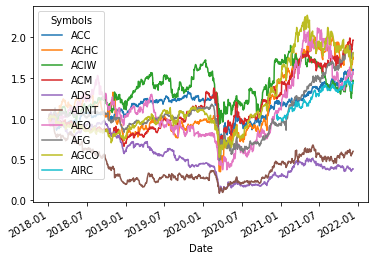

In [288]:
###check the cum return of first 10 stocks
cum_returns.iloc[:,:10].plot()

In [289]:
annual_return.isna().value_counts() ###check NaN values

Annual Return
False            395
dtype: int64

Which stock had the highest annual returns?

<AxesSubplot:title={'center':'Highest Annual Ret Stocks'}, xlabel='Symbols'>

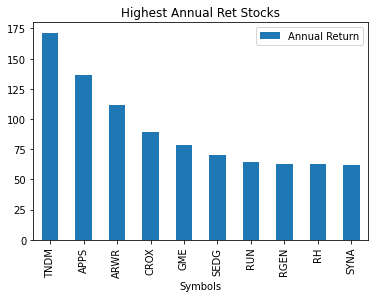

In [290]:
annual_return.sort_values(by='Annual Return', ascending=False).head(10).plot.bar(title='Highest Annual Ret Stocks')

Which stock had the highest lowest returns?

<AxesSubplot:title={'center':'Lowest Annual Ret Stocks'}, xlabel='Symbols'>

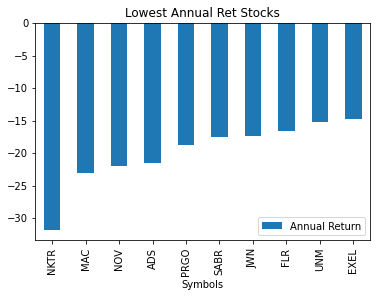

In [291]:
annual_return.sort_values(by='Annual Return', ascending=True).head(10).plot.bar(title='Lowest Annual Ret Stocks')

In [292]:
vol_annual = pd.DataFrame(PriceReturns.std().dropna()*16, columns =['Annual Vol'])

Which stocks had highest Vol?

<AxesSubplot:xlabel='Symbols'>

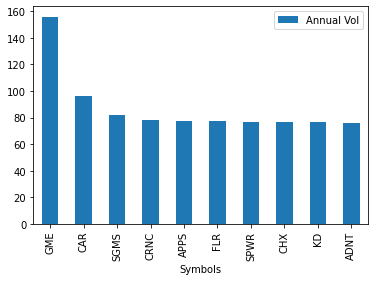

In [293]:
vol_annual.sort_values(by='Annual Vol', ascending=False).head(10).plot.bar()

Which stocks had the lowest vol?

<AxesSubplot:xlabel='Symbols'>

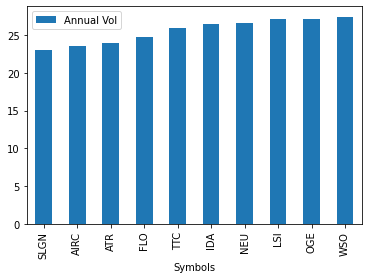

In [294]:
vol_annual.sort_values(by='Annual Vol').head(10).plot.bar()

How was the price performance of the top 10 High and Low Vol stocks?

In [298]:
High_vol_stocks = list(vol_annual.sort_values(by='Annual Vol', ascending=False).head(5).index)
Low_vol_stocks = list(vol_annual.sort_values(by='Annual Vol').head(5).index)

<AxesSubplot:xlabel='Date'>

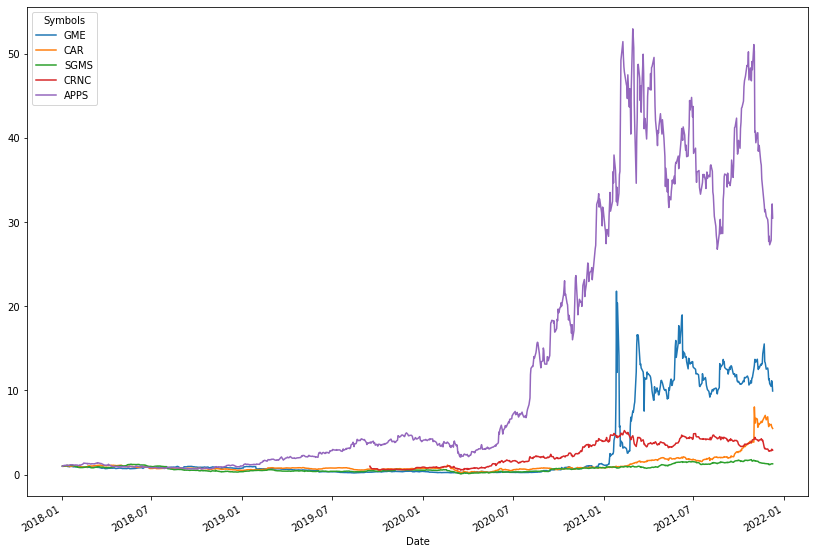

In [303]:
cum_returns[High_vol_stocks].plot(figsize=(14,10))

<AxesSubplot:xlabel='Date'>

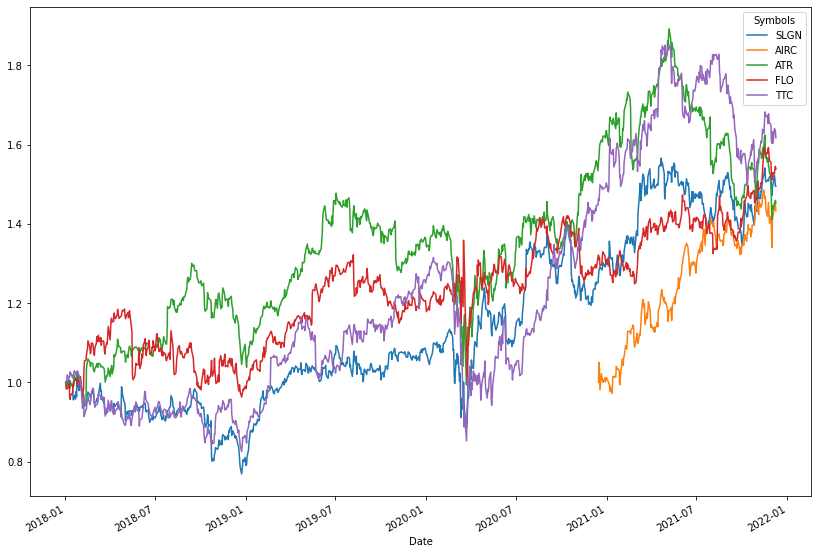

In [304]:
cum_returns[Low_vol_stocks].plot(figsize=(14,10))

Risk Contribution of an EW portfolio

In [ ]:
covariance = PriceReturns.cov()

In [218]:
numberofStocks = PriceReturns.shape[1]

In [219]:
ew = pd.Series(1/numberofStocks, index=PriceReturns.columns)

In [223]:
portfolio_vol = (ew.T @ covariance @ ew) ** 0.5

In [224]:
total_portfolio_variance = portfolio_vol **2

In [225]:
marginal_contribution = covariance @ ew

In [226]:
risk_contribution = np.multiply(marginal_contribution, ew.T)/total_portfolio_variance

<AxesSubplot:xlabel='Symbols'>

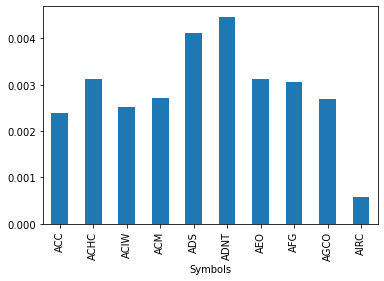

In [237]:
risk_contribution.head(10).plot.bar()

<AxesSubplot:xlabel='Date'>

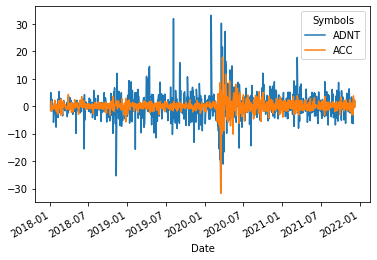

In [270]:
PriceReturns[['ADNT','ACC']].plot()